In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.shape

(891, 12)

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [8]:
data ['Age'] = data ['Age'].fillna(data ['Age'].mean())
data ['Embarked'] = data['Embarked'].fillna("S")

In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
data = data.drop (columns = ['Cabin','Ticket','Name','PassengerId'])

data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [11]:
data.nunique()

Survived      2
Pclass        3
Sex           2
Age          89
SibSp         7
Parch         7
Fare        248
Embarked      3
dtype: int64

In [12]:
n_data = data[['Age','Fare']]
c_data = data[['Survived','Pclass','Sex','SibSp','Parch','Embarked']]

In [13]:
# printing new unique values
column_names = c_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Survived
------------------------------------------
0    61.616162
1    38.383838
Name: Survived, dtype: float64


Column Name        : Pclass
------------------------------------------
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


Column Name        : Sex
------------------------------------------
male      64.758698
female    35.241302
Name: Sex, dtype: float64


Column Name        : SibSp
------------------------------------------
0    68.237935
1    23.456790
2     3.142536
4     2.020202
3     1.795735
8     0.785634
5     0.561167
Name: SibSp, dtype: float64


Column Name        : Parch
------------------------------------------
0    76.094276
1    13.243547
2     8.978676
5     0.561167
3     0.561167
4     0.448934
6     0.112233
Name: Parch, dtype: float64


Column Name        : Embarked
------------------------------------------
S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64




In [14]:
for i in data['Parch']:
    if i >=3:
        data['Parch'] = data['Parch'].replace(i,2)
        

In [15]:
for i in data['SibSp']:
    if i >=3:
        data['SibSp']=data['SibSp'].replace(i,2)

In [16]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [17]:
new_c_data=data[['Survived','Pclass','Sex','SibSp','Parch','Embarked']]


In [18]:
# printing new unique values
column_names = new_c_data.columns
for column_name in column_names:
    print("Column Name        :", column_name)
    print("------------------------------------------")
    print(data[column_name].value_counts(normalize=True, dropna=False)*100)
    print('\n')

Column Name        : Survived
------------------------------------------
0    61.616162
1    38.383838
Name: Survived, dtype: float64


Column Name        : Pclass
------------------------------------------
3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


Column Name        : Sex
------------------------------------------
male      64.758698
female    35.241302
Name: Sex, dtype: float64


Column Name        : SibSp
------------------------------------------
0    68.237935
1    23.456790
2     8.305275
Name: SibSp, dtype: float64


Column Name        : Parch
------------------------------------------
0    76.094276
1    13.243547
2    10.662177
Name: Parch, dtype: float64


Column Name        : Embarked
------------------------------------------
S    72.502806
C    18.855219
Q     8.641975
Name: Embarked, dtype: float64




<function matplotlib.pyplot.show(close=None, block=None)>

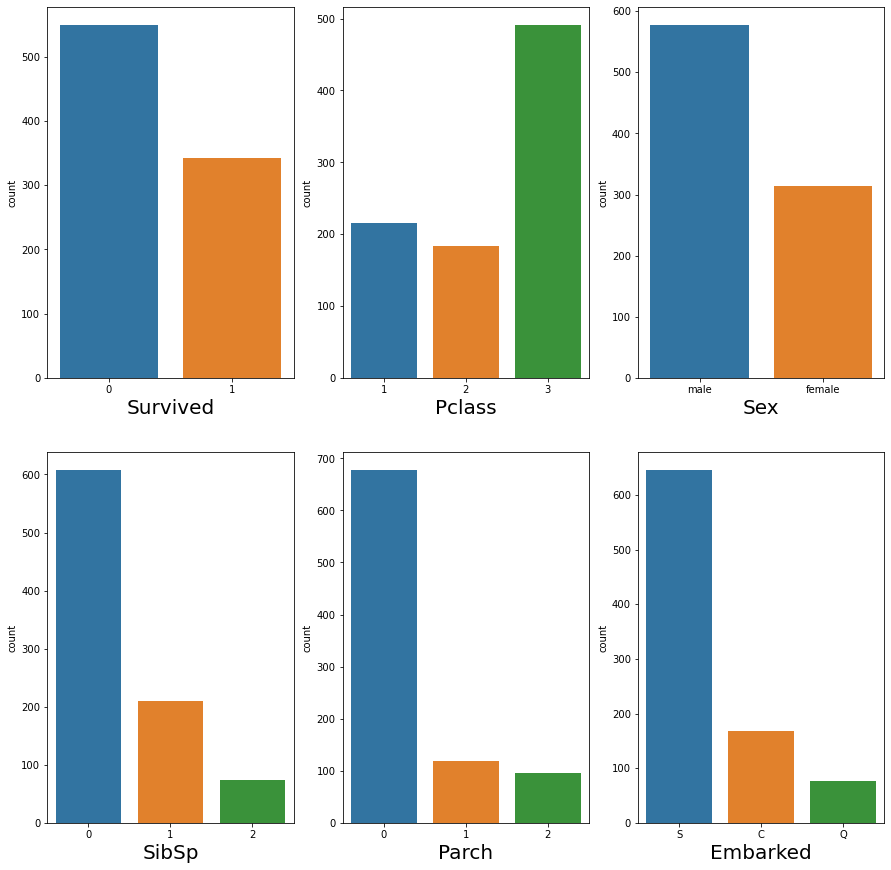

In [19]:
#Data Visualisation
#Univariate Analysis

plt.figure(figsize=(15,15))
plotnumber = 1
for column in new_c_data:
    if plotnumber <=6:
        ax= plt.subplot(2,3,plotnumber)
        sns.countplot(new_c_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

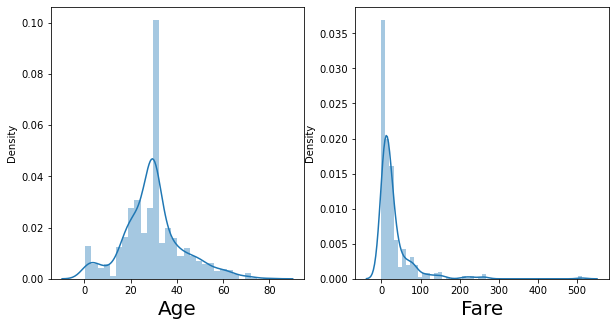

In [20]:
#Plotting graphs for numerical data
plt.figure(figsize=(10,5))
plotnumber = 1
for column in n_data:
    if plotnumber <=2:
        ax= plt.subplot(1,2,plotnumber)
        sns.distplot(n_data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show

In [21]:
#checking for skewness:
n_data.skew()

Age     0.434488
Fare    4.787317
dtype: float64

In [22]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.400673,0.345679,32.204208
std,0.486592,0.836071,13.002015,0.637727,0.663266,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,2.000000,2.000000,512.329200


In [23]:
# Data for Fare is looks highly skewed also there is a huge difference between 3rd quadrant and the maximum fare 
#Hence we will check for outliers

In [24]:
# Encoding data
from sklearn.preprocessing import LabelEncoder
L_encoder = LabelEncoder()

In [25]:
for i in data.columns:
    if data[i].dtypes=='object':
        data[i]=L_encoder.fit_transform(data[i].values.reshape(-1,1))

In [26]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


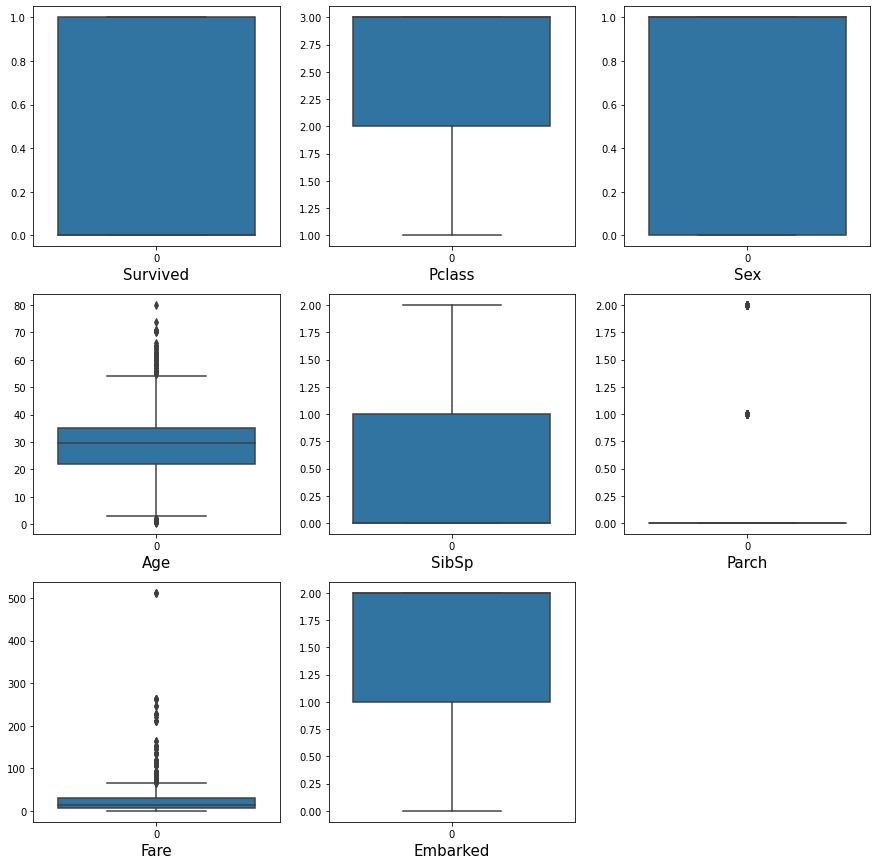

In [27]:
#checking for outliers:
plt.figure(figsize=(15,15))
graph =1
for column in data:
    if graph <=8:
        plt.subplot(3,3,graph)
        ax=sns.boxplot(data=data[column])
        plt.xlabel(column,fontsize=15)
    graph+=1
plt.show()

In [28]:
features=data.drop('Survived',axis=1)
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(features))
threshold=3
outliers=np.where(z>3)
outliers

(array([ 27,  88,  96, 116, 118, 258, 299, 311, 341, 377, 380, 438, 493,
        527, 557, 630, 672, 679, 689, 700, 716, 730, 737, 742, 745, 779,
        851], dtype=int64),
 array([5, 5, 2, 2, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 5, 2, 2, 5, 5, 5, 5, 5,
        5, 5, 2, 5, 2], dtype=int64))

In [29]:
data=data.drop(outliers[0])
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,2
3,1,1,0,35.000000,1,0,53.1000,2
4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2
887,1,1,0,19.000000,0,0,30.0000,2
888,0,3,0,29.699118,1,2,23.4500,2
889,1,1,1,26.000000,0,0,30.0000,0


In [30]:
data.reset_index()

,index,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,0,3,1,22.000000,1,0,7.2500,2
1,1,1,1,0,38.000000,1,0,71.2833,0
2,2,1,3,0,26.000000,0,0,7.9250,2
3,3,1,1,0,35.000000,1,0,53.1000,2
4,4,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
859,886,0,2,1,27.000000,0,0,13.0000,2
860,887,1,1,0,19.000000,0,0,30.0000,2
861,888,0,3,0,29.699118,1,2,23.4500,2
862,889,1,1,1,26.000000,0,0,30.0000,0


In [31]:
data_loss=((890-864)/890)*100
data_loss

2.9213483146067416

In [32]:
# checking for skewness:
data.skew()

Survived    0.502011
Pclass     -0.708375
Sex        -0.632203
Age         0.239002
SibSp       1.338489
Parch       1.735136
Fare        2.257178
Embarked   -1.328443
dtype: float64

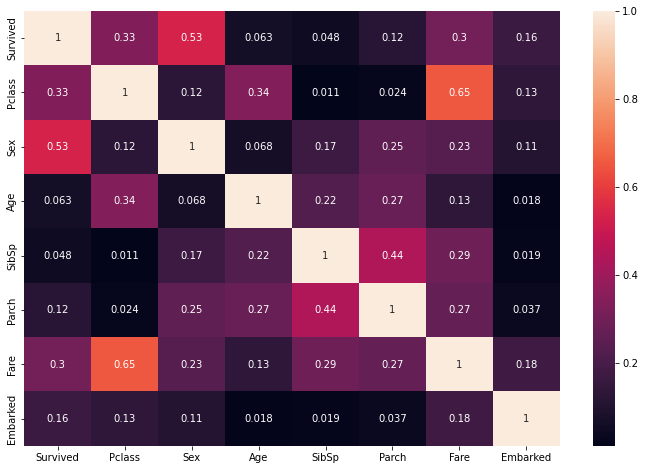

In [33]:
# Plotting heat map to check for multicollinerity and labelv//s feature relationship
df_corr = data.corr().abs()
plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot= True, annot_kws ={'size':10})
plt.show()

In [34]:
# Dividing data into feature and label
X= data.drop(columns=['Survived'])
Y= data['Survived']

In [35]:
#Applying standard scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
#Using VIF to check for muliticolinearity:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['vif']=[variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif['feature']= X.columns
vif

,vif,feature
0,2.086253,Pclass
1,1.116711,Sex
2,1.251092,Age
3,1.358243,SibSp
4,1.423672,Parch
5,2.261028,Fare
6,1.051842,Embarked


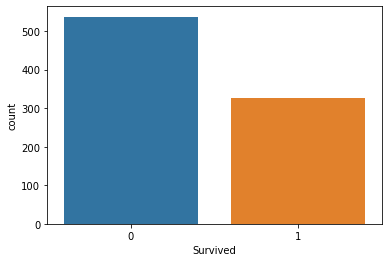

In [37]:
sns.countplot(Y)
plt.show()

In [38]:
print(Y.value_counts(normalize=True, dropna=False)*100)

0    62.152778
1    37.847222
Name: Survived, dtype: float64


In [39]:
# The targetdata looks alright

In [44]:
#traintestsplit
x_train,x_test,y_train,y_test = train_test_split (X_scaled,Y, test_size=0.25, random_state = 285)

In [45]:
# Model Selection
def model_selection (algorithm, x_train,y_train,x_test,y_test):
    algorithm.fit(x_train,y_train)
    pred_train = algorithm.predict(x_train)
    pred_test = algorithm.predict(x_test)
    print ("Acuraccy of training model :",accuracy_score(y_train,pred_train))
    print ("Accuracy of testing model :",accuracy_score(y_test,pred_test))
    print ("Classification report of training data :",classification_report(y_train,pred_train))
    print ("Classification report of test data : ",classification_report(y_test,pred_test))
    print ("Confusion Matrix \n",confusion_matrix(y_test,pred_test))

In [46]:
#Logistic Regression
lg= LogisticRegression()

In [49]:
model_selection(lg,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.808641975308642
Accuracy of testing model : 0.7592592592592593
Classification report of training data :               precision    recall  f1-score   support

           0       0.83      0.86      0.85       398
           1       0.76      0.73      0.75       250

    accuracy                           0.81       648
   macro avg       0.80      0.79      0.80       648
weighted avg       0.81      0.81      0.81       648

Classification report of test data :                precision    recall  f1-score   support

           0       0.79      0.85      0.82       139
           1       0.69      0.60      0.64        77

    accuracy                           0.76       216
   macro avg       0.74      0.72      0.73       216
weighted avg       0.75      0.76      0.76       216

Confusion Matrix 
 [[118  21]
 [ 31  46]]


In [50]:
#KNN
knn= KNeighborsClassifier()

In [51]:
model_selection(knn,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.8641975308641975
Accuracy of testing model : 0.7731481481481481
Classification report of training data :               precision    recall  f1-score   support

           0       0.87      0.92      0.89       398
           1       0.86      0.77      0.81       250

    accuracy                           0.86       648
   macro avg       0.86      0.85      0.85       648
weighted avg       0.86      0.86      0.86       648

Classification report of test data :                precision    recall  f1-score   support

           0       0.80      0.87      0.83       139
           1       0.72      0.60      0.65        77

    accuracy                           0.77       216
   macro avg       0.76      0.73      0.74       216
weighted avg       0.77      0.77      0.77       216

Confusion Matrix 
 [[121  18]
 [ 31  46]]


In [54]:
# Hyperparameter Tuning :

parameters = {'algorithm':['kd-tree','brute'],
    'leaf_size': range(3,7),
    'n_neighbors': range(3,10)
    }

clf = GridSearchCV(knn,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'algorithm': 'brute', 'leaf_size': 3, 'n_neighbors': 3}


In [55]:
knn1 = KNeighborsClassifier(algorithm='brute',leaf_size=3,n_neighbors=3)

In [56]:
model_selection(knn1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.8780864197530864
Accuracy of testing model : 0.7546296296296297
Classification report of training data :               precision    recall  f1-score   support

           0       0.88      0.92      0.90       398
           1       0.87      0.81      0.84       250

    accuracy                           0.88       648
   macro avg       0.88      0.87      0.87       648
weighted avg       0.88      0.88      0.88       648

Classification report of test data :                precision    recall  f1-score   support

           0       0.79      0.84      0.82       139
           1       0.68      0.60      0.63        77

    accuracy                           0.75       216
   macro avg       0.73      0.72      0.72       216
weighted avg       0.75      0.75      0.75       216

Confusion Matrix 
 [[117  22]
 [ 31  46]]


In [57]:
#Decision Tree
dt = DecisionTreeClassifier()
model_selection(dt,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9830246913580247
Accuracy of testing model : 0.7962962962962963
Classification report of training data :               precision    recall  f1-score   support

           0       0.98      1.00      0.99       398
           1       1.00      0.96      0.98       250

    accuracy                           0.98       648
   macro avg       0.99      0.98      0.98       648
weighted avg       0.98      0.98      0.98       648

Classification report of test data :                precision    recall  f1-score   support

           0       0.82      0.88      0.85       139
           1       0.75      0.65      0.69        77

    accuracy                           0.80       216
   macro avg       0.78      0.76      0.77       216
weighted avg       0.79      0.80      0.79       216

Confusion Matrix 
 [[122  17]
 [ 27  50]]


In [59]:
# Hyperparameter Tuning :

parameters = {'criterion':['gini','entropy'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6)
    }

clf = GridSearchCV(dt,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'min_samples_split': 3}


In [60]:
dt1 = DecisionTreeClassifier(criterion= 'gini', max_depth = 8, min_samples_leaf = 4, min_samples_split = 3)
model_selection(dt1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.8811728395061729
Accuracy of testing model : 0.7870370370370371
Classification report of training data :               precision    recall  f1-score   support

           0       0.87      0.95      0.91       398
           1       0.91      0.77      0.83       250

    accuracy                           0.88       648
   macro avg       0.89      0.86      0.87       648
weighted avg       0.88      0.88      0.88       648

Classification report of test data :                precision    recall  f1-score   support

           0       0.78      0.94      0.85       139
           1       0.83      0.51      0.63        77

    accuracy                           0.79       216
   macro avg       0.80      0.72      0.74       216
weighted avg       0.79      0.79      0.77       216

Confusion Matrix 
 [[131   8]
 [ 38  39]]


In [61]:
#Random Forest 
rf= RandomForestClassifier()
model_selection(rf,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.9814814814814815
Accuracy of testing model : 0.8009259259259259
Classification report of training data :               precision    recall  f1-score   support

           0       0.98      0.99      0.99       398
           1       0.99      0.96      0.98       250

    accuracy                           0.98       648
   macro avg       0.98      0.98      0.98       648
weighted avg       0.98      0.98      0.98       648

Classification report of test data :                precision    recall  f1-score   support

           0       0.82      0.88      0.85       139
           1       0.76      0.65      0.70        77

    accuracy                           0.80       216
   macro avg       0.79      0.77      0.78       216
weighted avg       0.80      0.80      0.80       216

Confusion Matrix 
 [[123  16]
 [ 27  50]]


In [62]:
# Hyperparameter Tuning :

parameters = {'criterion':['gini','entropy'],
    'max_depth': range(8,12),
    'min_samples_leaf': range(2,5),
    'min_samples_split':range(3,6),
    'n_estimators':(20,25,30,35)
    }

clf = GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print (clf.best_params_)

{'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}


In [64]:
#Random Forest : Gussian Classifier
rf1= RandomForestClassifier(n_estimators=20, criterion= 'gini', max_depth = 11, min_samples_leaf = 2, min_samples_split = 5)
model_selection(rf1,x_train,y_train,x_test,y_test)

Acuraccy of training model : 0.8996913580246914
Accuracy of testing model : 0.8101851851851852
Classification report of training data :               precision    recall  f1-score   support

           0       0.90      0.94      0.92       398
           1       0.90      0.83      0.86       250

    accuracy                           0.90       648
   macro avg       0.90      0.89      0.89       648
weighted avg       0.90      0.90      0.90       648

Classification report of test data :                precision    recall  f1-score   support

           0       0.81      0.91      0.86       139
           1       0.80      0.62      0.70        77

    accuracy                           0.81       216
   macro avg       0.81      0.77      0.78       216
weighted avg       0.81      0.81      0.80       216

Confusion Matrix 
 [[127  12]
 [ 29  48]]


<function matplotlib.pyplot.show(close=None, block=None)>

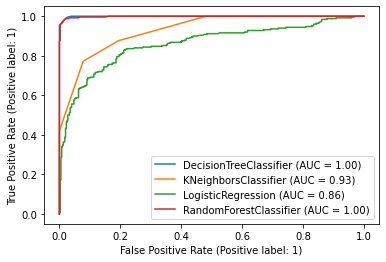

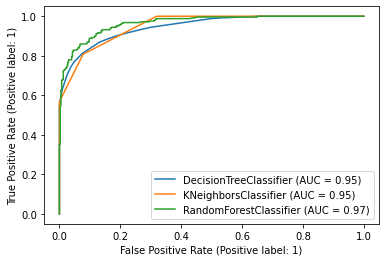

In [65]:
#Plotting AUC curves:
disp = plot_roc_curve(dt,x_train,y_train)
plot_roc_curve(knn,x_train,y_train, ax=disp.ax_)
plot_roc_curve(lg,x_train,y_train, ax=disp.ax_)
plot_roc_curve(rf,x_train,y_train, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show
disp1 = plot_roc_curve(dt1,x_train,y_train)
plot_roc_curve(knn1,x_train,y_train, ax=disp1.ax_)
plot_roc_curve(rf1,x_train,y_train, ax=disp1.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

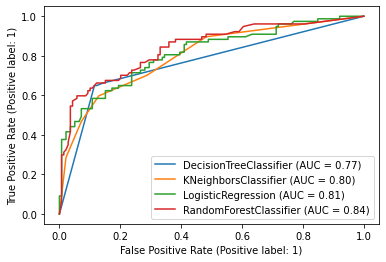

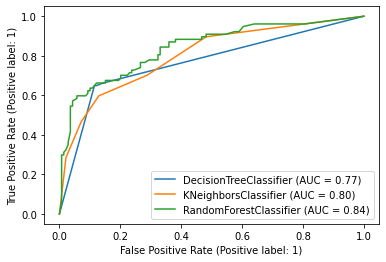

In [66]:
disp = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=disp.ax_)
plot_roc_curve(lg,x_test,y_test, ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test, ax=disp.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

disp1 = plot_roc_curve(dt,x_test,y_test)
plot_roc_curve(knn,x_test,y_test, ax=disp1.ax_)
plot_roc_curve(rf,x_test,y_test, ax=disp1.ax_)
plt.legend(prop={'size':10},loc='lower right')
plt.show

In [67]:
# Since AUC for random forest is the most we choose randonforest classifier to be the best

In [68]:
# Saving Model
import pickle
filename= 'Titanic.pkl'
pickle.dump(rf,open(filename, 'wb'))

In [69]:
#Conclusion
a= np.array(y_test)
predicted=np.array (rf.predict(x_test))
df = pd.DataFrame({"Orignal":a, "Predicted":predicted}, index = range(len(a)))
df

,Orignal,Predicted
0,1,1
1,1,1
2,0,0
3,1,0
4,0,0
...,...,...
211,0,0
212,0,0
213,0,0
214,0,0
